<a href="https://colab.research.google.com/github/Samdatascienti/Samdatascienti/blob/main/drug_modelling_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In order to acces different libraries we need, we imported the following librariies first pandas as pd, numpy as np and files to help us to access files in google drive

In [1]:
# as usual, let us load all the necessary libraries
import numpy as np  # numerical computation with arrays
import pandas as pd # library to manipulate datasets using dataframes
import scipy as sp  # statistical library
from google.colab import files

# below sklearn libraries for different models
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

#import libraries for implementing neural networks
import keras
from keras.models import Sequential
from keras.layers import Dense
# from keras.optimizers import SGD, Adam
from keras.regularizers import l2
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
# plot 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']='False'


when you are using google colab, it is possible to access data from google drive, but the user must give access by using drive.mount the content in google drive, then we click to the link provided to confirm the account where data are located, the system will provide codes to paste in python in order to access our data.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# 2015 data

the data were collected in different years, and different quarters. All data were uploaded in google drive. function of read_excel from pandas library were used to import data which was in xlsx format into dataframe, the cell bellow inludes 2015 years consumption data, imported by quarters, in order to see the data, only 5 observations were printed in data of last quarter.

In [ ]:
# path='/content/gdrive/MyDrive/Drug_prediction/Purchase_order_2015_2020.csv'
path_51='/content/gdrive/MyDrive/Drug_prediction/2015/3Months_01to03_2015.xlsx'
path_52='/content/gdrive/MyDrive/Drug_prediction/2015/3Months_04to06_2015.xlsx'
path_53='/content/gdrive/MyDrive/Drug_prediction/2015/3Months_07to09_2015.xlsx'
path_54='/content/gdrive/MyDrive/Drug_prediction/2015/3Months_10to12_2015.xlsx'
# importing file
data_51=pd.read_excel(path_51)
data_52=pd.read_excel(path_52)
data_53=pd.read_excel(path_53)
data_54=pd.read_excel(path_54)
data_51 = data_51[['QTY_AMOUNT','DESCRIPTION','S_LEVEL3_NAME','SITE_NAME','YEAR_MONTH']]
data_52 = data_52[['QTY_AMOUNT','DESCRIPTION','S_LEVEL3_NAME','SITE_NAME','YEAR_MONTH']]
data_53 = data_53[['QTY_AMOUNT','DESCRIPTION','S_LEVEL3_NAME','SITE_NAME','YEAR_MONTH']]
data_54 = data_54[['QTY_AMOUNT','DESCRIPTION','S_LEVEL3_NAME','SITE_NAME','YEAR_MONTH']]
data_5 = pd.concat([data_51, data_52,data_53,data_54], axis=0)
data_54.head()

,QTY_AMOUNT,DESCRIPTION,S_LEVEL3_NAME,SITE_NAME,YEAR_MONTH
0,324.0,ARTE 20MG + LUME 120MG TAB (3X6) B/30,Kirehe,RUSUMO CS--432,2015-12
1,245.0,ARTE 20MG+LUME 120MG DISP TAB (1X6) B/30,Kirehe,RUSUMO CS--432,2015-11
2,31.0,DEXAMETHASONE 4MG/ML 1ML INJECTION B/100,Rusizi,MUSHAKA CS--246,2015-10
3,24118.0,PARACETAMOL 500 MG TABLET B/1000,Rusizi,BUGARAMA CS--495,2015-12
4,1.0,READING GLASSES + 2.5 POWER,Rusizi,BUGARAMA CS--495,2015-12


In order to reduce the number of variables that are not useful to our tasks, only five column were retained which inludes quantity of drugs consumed, the name of drug consumed, districts of consumer, health center or hospital, year and month of consumption and were performed in all quarters. After that we combined all quarters dataframe into one with pandas function contatenate that serves to combine two dataframe.

# 2016 data

2016 year excel data were imported by using function of read_excel from pandas library into dataframe. In order to reduce the number of variables that are not useful to our tasks, only five column were retained which inludes quantity of drugs consumed, the name of drug consumed, districts of consumer, health center or hospital, year and month of consumption and were performed in all quarters. After that we combined all quarters dataframe into one. we printed only 5 observations for confirmation.

In [ ]:
path_61='/content/gdrive/MyDrive/Drug_prediction/2016/3Months_01to03_2016.xlsx'
path_62='/content/gdrive/MyDrive/Drug_prediction/2016/3Months_04to06_2016.xlsx'
path_63='/content/gdrive/MyDrive/Drug_prediction/2016/3Months_07to09_2016.xlsx'
path_64='/content/gdrive/MyDrive/Drug_prediction/2016/3Months_09to12_2016.xlsx'
# importing file
data_61=pd.read_excel(path_61)
data_62=pd.read_excel(path_62)
data_63=pd.read_excel(path_63)
data_64=pd.read_excel(path_64)
data_61 = data_61[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_62 = data_62[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_63 = data_63[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_64 = data_64[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_6 = pd.concat([data_61, data_62,data_63,data_64], axis=0)
data_6.head()

,QTY_AMOUNT,DESCRIPTION,SITE_NAME,S_LEVEL3_NAME,YEAR_MONTH
0,92.0,ACETYLSALICYLATE LYSINE 500MG INJ B/50,NYAKARENZO CS--1233,Rusizi,2016-03
1,1126.0,AMINOPHYLLINE 100MG TABLET B/1000,NYAKARENZO CS--1233,Rusizi,2016-03
2,4.0,AMINOPHYLLINE 25MG/ML INJECTION B/100,GASHORA CS--447,Bugesera,2016-03
3,2260.0,OMEPRAZOLE 20MG CAPSULE B/100,NYAMYUMBA CS--76,Nyaruguru,2016-03
4,36.0,EXAMINATION GLOVES POWDERED NS T 7.5,NYAMYUMBA CS--76,Nyaruguru,2016-03


# 2017 data

2017 year excel data were imported by using function of read_excel from pandas library into dataframe. In order to reduce the number of variables that are not useful to our tasks, only five column were retained which inludes quantity of drugs consumed, the name of drug consumed, districts of consumer, health center or hospital, year and month of consumption and were performed in all quarters. After that we combined all quarters dataframe into one. we printed only 5 observations for confirmation.

In [ ]:
path_71='/content/gdrive/MyDrive/Drug_prediction/2017/3Months_01to03_2017.xlsx'
path_72='/content/gdrive/MyDrive/Drug_prediction/2017/3Months_04to06_2017.xlsx'
path_73='/content/gdrive/MyDrive/Drug_prediction/2017/3Months_07to09_2017.xlsx'
path_74='/content/gdrive/MyDrive/Drug_prediction/2017/3Months_10to12_2017.xlsx'
# importing file
data_71=pd.read_excel(path_71)
data_72=pd.read_excel(path_72)
data_73=pd.read_excel(path_73)
data_74=pd.read_excel(path_74)
data_71 = data_71[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_72 = data_72[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_73 = data_73[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_74 = data_74[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_7 = pd.concat([data_71, data_72,data_73,data_74], axis=0)
data_7.head()

,QTY_AMOUNT,DESCRIPTION,SITE_NAME,S_LEVEL3_NAME,YEAR_MONTH
0,5000.0,MINIGRIP SACHET B/100,GACUBA II--197,Rubavu,2017-03
1,165.0,COTRIMOXAZOLE 120 MG TABLET B/1000,CIMERWA--239,Rusizi,2017-02
2,3200.0,AMINOPHYLLINE 100MG TABLET B/1000,MAREBA CS--450,Bugesera,2017-02
3,332.0,ACETYLSALICYLIC ACID 100MG TABLET B/1000,CIMERWA--239,Rusizi,2017-02
4,3280.0,CHLORPHENIRAMINE 4 MG TABLET B/1000,MAREBA CS--450,Bugesera,2017-02


# 2018

2017 year excel data were imported by using function of read_excel from pandas library into dataframe. In order to reduce the number of variables that are not useful to our tasks, only five column were retained which inludes quantity of drugs consumed, the name of drug consumed, districts of consumer, health center or hospital, year and month of consumption and were performed in all quarters. After that we combined all quarters dataframe into one. we printed only 5 observations for confirmation.

In [ ]:
path_81='/content/gdrive/MyDrive/Drug_prediction/2018/3Months_04to06_2018.xlsx'
path_82='/content/gdrive/MyDrive/Drug_prediction/2018/3Months_07to09_2018.xlsx'
path_83='/content/gdrive/MyDrive/Drug_prediction/2018/3Months_10to12_2018.xlsx'
path_84='/content/gdrive/MyDrive/Drug_prediction/2018/3months_01to03_2018.xlsx'
# importing file
data_81=pd.read_excel(path_81)
data_82=pd.read_excel(path_82)
data_83=pd.read_excel(path_83)
data_84=pd.read_excel(path_84)
data_81 = data_81[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_82 = data_82[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_83 = data_83[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_84 = data_84[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_8 = pd.concat([data_81, data_82,data_83,data_84], axis=0)
data_8.head()

,QTY_AMOUNT,DESCRIPTION,SITE_NAME,S_LEVEL3_NAME,YEAR_MONTH
0,2000.0,MEBENDAZOLE 100 MG TABLET B/1000,MWENDO (Gitwe) CS--1319,Ruhango,2018-06
1,15.0,OIL IMMERSION 100ML,MWENDO (Gitwe) CS--1319,Ruhango,2018-06
2,5.0,READING GLASSES + 2.00 POWER,BUGARAMA CS--495,Rusizi,2018-06
3,17.0,TAPE ZINC OXIDE 10CM X 5M B/1,BUGARAMA CS--495,Rusizi,2018-06
4,24675.0,PARACETAMOL 500 MG TABLET B/1000,COR-UNUM CS--4,Nyarugenge,2018-04


# 2019

2016 year excel data were imported by using function of read_excel from pandas library into dataframe. In order to reduce the number of variables that are not useful to our tasks, only five column were retained which inludes quantity of drugs consumed, the name of drug consumed, districts of consumer, health center or hospital, year and month of consumption and were performed in all quarters. After that we combined all quarters dataframe into one. we printed only 5 observations for confirmation.

In [ ]:
path_91='/content/gdrive/MyDrive/Drug_prediction/2019/3Months_01to03_2019.xlsx'
path_92='/content/gdrive/MyDrive/Drug_prediction/2019/3Months_04to06_2019.xlsx'
# importing file
data_91=pd.read_excel(path_91)
data_92=pd.read_excel(path_92)
data_91 = data_91[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_92 = data_92[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_9 = pd.concat([data_91, data_92], axis=0)
data_9.head()

,QTY_AMOUNT,DESCRIPTION,SITE_NAME,S_LEVEL3_NAME,YEAR_MONTH
0,279.0,SURGICAL BLADE NO 22,GAHINI HD--406,Kayonza,2019-03
1,28.0,PYRAZINAMIDE 400 MG TABLET B/672,KABGAYI HD--133,Muhanga,2019-03
2,23.0,TENOF/300+LAMIVUDINE/300+EFAV/600 30TABS,RUTENDERI CS--306,Gakenke,2019-03
3,3.0,EFAVIRENZ 50MG CAPSULE B/30,RUTENDERI CS--306,Gakenke,2019-03
4,4.0,NEVIRAPINE 10MG/ML SYRUP 240 ML B/1,RUTENDERI CS--306,Gakenke,2019-03


# Combined dataset

after importing data by year we combined all dataframe into one dataframe as fulldata to use in our task with concatenate function from pandas library



In [ ]:
data_comb = pd.concat([data_5, data_6, data_7, data_8,data_9], axis=0)
data_comb.head()

,QTY_AMOUNT,DESCRIPTION,S_LEVEL3_NAME,SITE_NAME,YEAR_MONTH
0,7.0,GIEMSA STAIN 500ML,Gasabo,KINYINYA CS--25,2015-01
1,150.0,ARTE 20MG + LUME 120MG TAB (3X6) B/30,Rwamagana,RUBONA CS--362,2015-03
2,407.0,MEBENDAZOLE 100 MG TABLET B/1000,Gicumbi,RUTARE (GICUMBI) CS--351,2015-01
3,31.0,EFAVIRENZ 600MG TABLETS B/30,Kicukiro,GAHANGA CS--31,2015-01
4,10080.0,IBUPROFEN 200 MG TABLET B/1000,Nyamagabe,MUSHUBI CS--107,2015-01


# Data Description

we printed 20 most consumed drugs by count in order to select the drugs we will remain with to train model

In [ ]:
drug=data_comb['DESCRIPTION'].value_counts(normalize=False)
drug=pd.DataFrame(drug)
drug.head(20)

,DESCRIPTION
COTRIMOXAZOLE 480 MG TABLET B/1000,29301
COTRIMOXAZOLE 240MG/5ML SYRUP 100ML B/1,27826
AMOXICILLIN 250MG CAPSULE B/1000,24024
METRONIDAZOLE 250MG TABLET B/1000,23560
PARACETAMOL 500 MG TABLET B/1000,23515
AMOXICILLIN 125MG/5ML SUSP 100ML B/1,22750
CLOXACILLIN 250 MG CAPSULE B/1000,22651
ERYTHROMYCIN 250 MG TABLET B/1000,22646
O.R.S SACHET 20.5G B/100,22634
CHLORPHENIRAMINE 4 MG TABLET B/1000,22112


the most 5 consumed drugs by count are COTRIMOXAZOLE 480 MG TABLET B/1000	with frequency of 29301, second consumed drug is COTRIMOXAZOLE 240MG/5ML SYRUP 100ML B/1 with frequency of 27826, the third consumed drug is AMOXICILLIN 250MG CAPSULE B/1000 with frequency of	24024, the fourth consumed drug is METRONIDAZOLE 250MG TABLET B/1000	with frequency of 23560, the fifth consumed drug is PARACETAMOL 500 MG TABLET B/1000	23515

to save dataframe into csv format and to downoald it to our local personal computer

In [ ]:
# # Save submission file
# drug.to_csv('drugs.csv')
# files.download('drugs.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Data description of all information

In [ ]:
data_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4090170 entries, 0 to 267035
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   QTY_AMOUNT     float64
 1   DESCRIPTION    object 
 2   S_LEVEL3_NAME  object 
 3   SITE_NAME      object 
 4   YEAR_MONTH     object 
dtypes: float64(1), object(4)
memory usage: 187.2+ MB


The dataset has 4,090,170 observations and five variables. variable of amount in quantity of consumpyion (QTY_AMOUNT) is recored in float type as decimal, Description of drug, name of disrtict (DESCRIPTION), health center or hospital (SITE_NAME), year and month of consumption (YEAR_MONTH) are recorded as string in object format. The data use memory equal to 187.2 MB.

In [ ]:
data_comb["YEAR_MONTH"].value_counts(normalize=False)

2019-06      90691
2019-05      90425
2018-10      89175
2018-05      87834
2018-01      87771
2019-01      87395
2018-11      86584
2018-02      86449
2017-11      86369
2019-04      85920
2018-08      85212
2018-04      84571
2019-03      83857
2018-12      83675
2017-10      83598
2018-09      83542
2017-12      83440
2018-07      82995
2018-03      82918
2018-06      82420
2019-02      81897
'2016-10'    78274
2017-02      78236
2017-03      77988
2016-09      75949
2017-09      75724
2017-05      75519
'2016-11'    75282
2017-04      75209
'2016-05'    75037
2016-08      74847
2017-06      74380
'2016-06'    74269
'2016-04'    72441
2017-01      71944
2017-08      71689
2016-03      71416
2017-07      71267
'2016-12'    70977
2016-07      70757
2015-10      69554
2016-02      68204
2015-09      68172
2016-01      68110
2015-07      65438
2015-08      65208
2015-06      65088
2015-11      64313
2015-05      63771
2015-12      63508
2015-04      60769
2015-03      60676
2015-02     

all years were printed to check any error in column, in order to remove it and transfrom entire column in dates format. to words EACH and NONE found in YEAR_MONTH column were replaced with empty.

In [ ]:
data["YEAR_MONTH"].value_counts(normalize=False)

2019-06      90691
2019-05      90425
2018-10      89175
2018-05      87834
2018-01      87771
2019-01      87395
2018-11      86584
2018-02      86449
2017-11      86369
2019-04      85920
2018-08      85212
2018-04      84571
2019-03      83857
2018-12      83675
2017-10      83598
2018-09      83542
2017-12      83440
2018-07      82995
2018-03      82918
2018-06      82420
2019-02      81897
'2016-10'    78274
2017-02      78236
2017-03      77988
2016-09      75949
2017-09      75724
2017-05      75519
'2016-11'    75282
2017-04      75209
'2016-05'    75037
2016-08      74847
2017-06      74380
'2016-06'    74269
'2016-04'    72441
2017-01      71944
2017-08      71689
2016-03      71416
2017-07      71267
'2016-12'    70977
2016-07      70757
2015-10      69554
2016-02      68204
2015-09      68172
2016-01      68110
2015-07      65438
2015-08      65208
2015-06      65088
2015-11      64313
2015-05      63771
2015-12      63508
2015-04      60769
2015-03      60676
2015-02     

# selecting only required medecines

Chnging YEAR_MONTH variable from object format into datetime format

the dataset has more than 5000 drugs, in our tasks we decided to use only 10 most consumed drugs.

In [ ]:
data=data_comb.replace(to_replace={'YEAR_MONTH': {"'EACH'":'',"'NONE'":''}}, value=None)
# overwriting data after changing format
data["YEAR_MONTH"]= pd.to_datetime(data["YEAR_MONTH"])
# data.info()
options = ['COTRIMOXAZOLE 480 MG TABLET B/1000', 'AMOXICILLIN 250MG CAPSULE B/1000','PARACETAMOL 500 MG TABLET B/1000','O.R.S SACHET 20.5G B/100',
           'CHLORPHENIRAMINE 4 MG TABLET B/1000', 'NEVIRAPINE 200MG TABLET B/60',  'AMINOPHYLLINE 100MG TABLET B/1000', 
           'ARTE 20MG + LUME 120MG TAB (4X6) B/30', 'CROMOGLYCATE DISODIC OPHT SOLUTION 2%',
           'IODINE POLYVIDONE 10%  SLN 200ML B/1']

# selecting rows based on condition
new_data =data[data['DESCRIPTION'].isin(options)]

# print('\nResult dataframe :\n', rslt_df)
new_data.head()

,QTY_AMOUNT,DESCRIPTION,S_LEVEL3_NAME,SITE_NAME,YEAR_MONTH
10,50.0,CROMOGLYCATE DISODIC OPHT SOLUTION 2%,Gakenke,RUKURA CS--300,2015-01-01
12,6700.0,AMOXICILLIN 250MG CAPSULE B/1000,Gakenke,RUKURA CS--300,2015-01-01
16,17609.0,PARACETAMOL 500 MG TABLET B/1000,Huye,SIMBI CS--96,2015-01-01
23,3083.0,PARACETAMOL 500 MG TABLET B/1000,Gatsibo,NYAGIHANGA CS--400,2015-01-01
30,117.0,NEVIRAPINE 200MG TABLET B/60,Gisagara,KIBILIZI HD--61,2015-01-01


10 selected drugs and their frequency, 

In [ ]:
new_data['DESCRIPTION'].value_counts(normalize=False)

COTRIMOXAZOLE 480 MG TABLET B/1000       29301
AMOXICILLIN 250MG CAPSULE B/1000         24024
PARACETAMOL 500 MG TABLET B/1000         23515
O.R.S SACHET 20.5G B/100                 22634
CHLORPHENIRAMINE 4 MG TABLET B/1000      22112
NEVIRAPINE 200MG TABLET B/60             22037
AMINOPHYLLINE 100MG TABLET B/1000        19475
ARTE 20MG + LUME 120MG TAB (4X6) B/30    18306
CROMOGLYCATE DISODIC OPHT SOLUTION 2%    17191
IODINE POLYVIDONE 10%  SLN 200ML B/1     16434
Name: DESCRIPTION, dtype: int64

Districts by their frequency. Gakenke, Karongi, Gicumbi, Nyagatare, and Gatsibo have higher number of druug consumption than all other districts, even though there are 12,947 consumed drugs with no recorrded districts. We will impute those missing values by using other column.

In [ ]:
new_data['S_LEVEL3_NAME'].value_counts(normalize=False)

NONE          12947
Gakenke       10320
Karongi        9391
Gicumbi        9273
Nyagatare      8814
Gatsibo        8096
Rusizi         7744
Rulindo        7610
Kayonza        7115
Gasabo         7014
Nyabihu        6943
Nyamasheke     6911
Huye           6882
Bugesera       6878
Nyamagabe      6826
Musanze        6784
Kirehe         6541
Burera         6532
Ruhango        6385
Nyanza         6365
Gisagara       6131
Rwamagana      6061
Ngoma          5819
Rutsiro        5663
Rubavu         5631
Muhanga        5448
Nyaruguru      5322
Kamonyi        5281
Ngororero      5275
Nyarugenge     4305
Kicukiro       3971
Name: S_LEVEL3_NAME, dtype: int64

In [ ]:
# site=new_data['SITE_NAME'].value_counts(normalize=False)
# df_site=pd.DataFrame(site)
# # Save submission file
# site.to_csv('site.csv')
# files.download('site.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

data_coded=new_data.replace(['NEMBA HD--29','KARAMBO CS--293','NEMBA DISP--296','KIVUYE CS--327',
'KINYABABA CS--325','BUNGWE CS--320','BUTARO CS--321','KINONI CS--324','BUTARO HD--322',
'GAHUNGA CS--586','GATEBE CS--1560','CYANIKA CS--605','GITARE CS--323','MUCACA CS--328',
'NDONGOZI CS--1287','RWERERE CS--505','RUSASA CS--332','RUHOMBO CS--1279','RUHUNDE CS--331',
'BUNGWE CS--629','NEMBA HD--297'], 'Burera')
data_coded=data_coded.replace(['NYAMATA HD--454','RYAMANYONI CS--418','RILIMA CS--457',
'NZANGWA CS--455','GASHORA CS--447','NTARAMA CS--1101','NGERUKA CS--604','KAMABUYE CS--449',
'RUHUHA CS--458','MWOGO CS--452','GAKURAZO CS--446','NYAMATA CS--453','MWENDO CS--9',
'PRISON RILIMA (VIA CS) PRIS--456'],'Bugesera')
data_coded=data_coded.replace(['RULI HD--302','GATONDE CS--291',
'RUTAKE CS--305','RULI CS--301','NYANGE (RULI) CS--298','COKO (RULI) CS--289',
'RUTENDERI CS--306','KAMUBUGA CS--483','RUSORO CS--304','RUKURA CS--300',
'MUYONGWE HC--1534','NYUNDO (GAKENKE) CS--299','BUSHOKA CS--288','BUSENGO CS--287',
'RUSHASHI CS--303','JANJA CS--292','GAKENKE CS--387','MUHONDO CS--342',
'CYABINGO CS--290','MUSASA CS--191','MINAZI CS--1651','COKO CS--67'],'Gakenke')
data_coded=data_coded.replace(['KIBAGABAGA HD--22','KABUYE CS--17','KIMIRONKO CS--23','NYACYONGA CS--26','NYAKABUNGO CS--411',
'KAGUGU CS--20','KINYINYA CS--25','GIKOMERO II CS--654','KABUGA CS--144','SOLACE MINISTRIES--1228',
'KABUGA CS--33','REMERA CS--440','KAYANGA CS--21','KABUYE CS--422','JALI CS--16',
'RWANDA WOMEN NET--1229','GIHOGWE CS--513','RUBUNGO CS--28','CARAES NDERA--14','KACYIRU CS--18',
'AVEGA AGAHOZO REMERA--13','KAJEVUBA CS--272','GIKOMERO I CS--1322','NYARWUNGO CS--111',
'KACYIRU POLICE HOSPITAL--19','BUMBOGO (Ex - GIKOMERO I) CS--552','GASAGARA CS--127','NDUBA CS--551',
'PRISON KIMIRONKO PRIS--27/1213','KING FAISAL HOSPITAL--24'],'Gasabo')
data_coded=data_coded.replace(['NGARAMA HD--398','KIZIGURO HD--395','GASANGE CS--388','HUMURE CS--390','RUGARAMA CS--11',
'KABARORE CS--391','NGARAMA CS--397','GITOKI CS--561','KIZIGURO CS--394','KIBONDO CS--393',
'NYAGIHANGA CS--400','RWIMITERERI CS--403','GATSIBO CS--606','MUHURA CS--396','NYABIHEKE CS--610',
'RUGARAMA CS--1641','KIZIGURO CS--632','GITUZA CS--389'],'Gatsibo')
data_coded=data_coded.replace(['BYUMBA HD--336','MUHONDO CS--295','GISIZA CS--337','RUSHAKI CS--350','BYUMBA CS--335',
'MUKONO CS--344','BWISIGE CS--334','MUKO CS--343','GITI CS--338','MUNYINYA CS--346',
'MANYAGIRO CS--340','BUSHARA CS--333','MULINDI (GICUMBI) CS--345','RWESERO CS--352','MUSENYI CS--347',
'MIYOVE CS--341','KIGOGO CS--339','RUTARE (GICUMBI) CS--351','RUVUNE CS--1345','RUHENDA CS--349',
'TANDA CS--353','CYUMBA CS--1346','PRISON DE MIYOVE--1102','RUBAYA CS--234','MAREMBO CS--517',
'GIHEMBE CS--461','RUGALI CS--476'],'Gicumbi')
data_coded=data_coded.replace(['KIBILIZI HD--61','GAKOMA HD--54','SAVE CS--66',
'KIBILIZI CS--60','KIBILIZI CS--41','GIKONKO CS--55','Gishubi CS--612','GISAGARA CS--57',
'KANSI CS--58','GIKORE CS--56','GAKOMA CS--53','KABILIZI CS--69','KIRARAMBOGO CS--63'
'KIGEMBE CS--62','MUGOMBWA CS--64','KIBAYI CS--59','MUGANZA CS--72','AGAHABWA CS--1500','KIRARAMBOGO CS--63','KIGEMBE CS--62'],'Gisagara')
data_coded=data_coded.replace(['KABUTARE HD--85','SIMBI CS--96','RWANIRO CS--95','SOVU CS--97','RUKIRA CS--441',
'MBAZI CS--89','RUBONA CS--362','MATYAZO CS--88','CUSP BUTARE CS--83','RUBONA CS--235',
'RUSATIRA CS--94','RANGO CS--91','PRISON KARUBANDA PRIS--90','NGOMA CS--591','MUKURA CS--188',
'POLICE HC /HUYE CS--84','MARABA CS--71','RUHASHYA CS--93','MARABA CS--616','KINIHIRA CS--185',
'MUKURA CS--1557'],'Huye')
data_coded=data_coded.replace(['REMERA RUKOMA HD--153','KIGESE CS--148','KARANGARA CS--146',
'MUSAMBIRA CS--150','GIHINGA CS--448','GIHARA CS--143','REMERA RUKOMA CS--152','MUGINA CS--149',
'NYAGIHAMBA CS--151','CYERU CS--142','KAMONYI CS--257','KAMONYI CS--145','KAYENZI CS--147',
'KARAMA--1666'],'Kamonyi')
data_coded=data_coded.replace(['KIBUYE HD--162','KIRINDA HD--165','MUKUNGU CS--170','RUBENGERA CS--174',
'MUSANGO CS--172','BIRAMBO CS--155','KARORA CS--160','MUBUGA CS--167','MUGONERO DISP--168',
'RUGABANO CS--176','GISOVU CS--158','KARAMBO CS--200','POLICE KARONGI CS--159','KIRINDA DISP--164',
'BUBAZI CS--156','MUNZANGA CS--171','KIRAMBO CS--163','MWEYA CS--44','KIBUYE DISP--161',
'MURAMBI CS--276','MPEMBE CS--166','MUGONERO HD--169','BISESERO CS--617','BIGUHU CS--154',
'KIZIBA REFUGEE CAMP--462'],'Karongi')
data_coded=data_coded.replace(['RWINKWAVU HD--417','GAHINI HD--406','KARAMA CS--86',
'RUKARA CS--413','NYAMIRAMA CS--412','RUTARE(KAYONZA) CS--415','KABARONDO CS--407','KAGEYO CS--594',
'GAHINI CS--405','RWINKWAVU CS--416','MUKARANGE CS--409','KARAMA CS--408','CYARUBARE CS--404',
'RURAMIRA CS--414','Buhabwa CS--496','MUKARANGE CS--1655','KAGEYO CS--631'],'Kayonza')
data_coded=data_coded.replace(['MASAKA DISTRICT HOSPITAL--1234','BUSANZA CS--30','GAHANGA CS--31','MASAKA CS--36',
'GIKONDO CS--32','KICUKIRO CS--35','NYARUGUNGA CS--558','BETHSAIDA CS--29','GATENGA CS--1306',
'KAIROS CS--1647','KANOMBE HM--34'],'Kicukiro')
data_coded=data_coded.replace(['KIREHE HD--424','GAHARA CS--420',
'MULINDI(KIREHE) CS--425','MAHAMA CS--1320','NTARUKA(KIREHE) CS--429','KIREHE CS--423',
'BUKORA CS--419','RUSUMO CS--432','KIGARAMA HC--1460','NTARUKA CS--329','GASHONGORA CS--421',
'NYABITARE CS--430','MUSAZA CS--426','NASHO CS--428','RWANTONDE CS--1325','MUSHIKIRI DISP--427',
'NYAMUGALI CS--330','NYARUBUYE CS--431','Mahama Refugee Camp I--1646','Mahama Refugee Camp II--1671'
],'Kirehe')
data_coded=data_coded.replace(['GITARAMA CS--130','KABGAYI HD--133','MUSHISHIRO CS--135','BYIMANA CS--113',
'KABGAYI CS--132','NYABIKENKE CS--136','BURAMBA CS--128','RUTOBWE DISP--140','NYABINONI CS--137',
'GASOVU CS--129','SHYOGWE CS--141','RUGENDABALI CS--1321','PRISON GITARAMA PRIS--139','NGARA CS--108'
],'Muhanga')
data_coded=data_coded.replace(['RUHENGERI HD--317','GATARAGA CS--1103','BUSOGO CS--309','NYAKINAMA CS--315',
'KABERE CS--311','SHINGIRO CS--319','BISATE CS--308','GASIZA CS--310','KIMONYI CS--622',
'MUSANZE CS--1475','MURANDI CS--314','KINIGI CS--313','GASHAKI CS--602','RWAZA CS--318',
'RUHENGERI DISP--877','KARWASA CS--312','PRISON DE RUHENGERI--536','HINDIRO CS--474',
'GASIZA CS--473','RUGARAMA CS--401'],'Musanze')
data_coded=data_coded.replace(['NGOMA HD--436','RUKOMA SAKE CS--442','NGOMA CS--435','NDEGO CS--410',
'RUKUMBERI CS--443','JARAMA CS--434','GITUKU CS--433','KIRWA CS--437','MUTENDERI CS--438',
'ZAZA CS--445','SANGAZA CS--444','NYANGE (NGOMA) CS--439','PRISON NGOMA PRIS--596','MUGANO CS--562',
'NYANGE CS--1688','KIBUNGO HD--436','KIBUNGO CS--435','PRISON KIBUNGO PRIS--596'],'Ngoma')
data_coded=data_coded.replace(['MUHORORO HD--227','KABAYA HD--225','NTAGANZWA CS--229','KABAYA CS--224',
'RAMBA CS--233','RUSUSA CS--236','MUHORORO CS--226','KAGEYO CS--392','RUBAYA CS--348',
'NTOBWE CS--230','NYANGE B CS--232','NYANTANGA CS--77','NYANGE A CS--231','MURAMBA CS--228',
'GASHONYI CS--472','GASHUBI CS--223','GATUMBA CS--630','RUHUNGA CS--635','NYAMISA CS--634',
'MABUYE CS--475'],'Ngororero')
data_coded=data_coded.replace(['SHYIRA HD--222','RWANKERI CS--220','RAMBURA CS--218',
'KORA CS--214','RUREMBO CS--219','NYAKIGEZI CS--216','KABATWA CS--212','SHYIRA CS--221',
'GAKAMBA CS--209','KAREBA CS--213','BIGOGWE CS--207','BIREMBO CS--208','MWIYANIKE CS--215',
'JOMBA CS--210','JENDA CS--99','NYAKIRIBA H C--1555','KABARI CS--647','NGANZO CS--1650',
'KINTOBO CS--637'],'Nyabihu')
data_coded=data_coded.replace(['NYAGATARE HD--380','MIMURI CS--374','RWANKUBA CS--307',
'CYABAYAGA CS--367','NTOMA CS--376','KATABAGEMU CS--372','RUKOMO CS--382','NYAGAHITA CS--378',
'NYAGATARE CS--379','RWEMPASHA CS--384','KABUGA CS--369','KARANGAZI CS--371','RURENGE CS--383',
'NYARUREMA CS--381','MUHAMBO CS--375','CYONDO CS--368','NYAKIGANDO CS--643','TABAGWE CS--385',
'RWIMBOGO CS--1045','MATIMBA CS--373','KAGITUMBA CS--370','NDAMA CS--642'],'Nyagatare')
data_coded=data_coded.replace(['NYAMAGABE HD--103','NYAMAGABE CS--102','CYANIKA CS--98','MBUGA CS--105',
'MUSHUBI CS--107','KADUHA HD--101','KADUHA CS--100','KINYAMAKARA CS--87','NYAMAGABE CS--109',
'RUGEGE CS--112','KIBUMBWE CS--545','BURUHUKIRO CS--1343','KITABI CS--104','UWINKINGI CS--646',
'MUSEBEYA CS--106','NYARUSIZA CS--110','GIKONGORO PRISON C--492','SHABA CS--645','KIGEME HD--103','KIGEME CS--102'],'Nyamagabe')
data_coded=data_coded.replace(['KIBOGORA HD--262','BUSHENGE HD--253','MUKOMA CS--122','YOVE CS--270','MUYANGE CS--265'
'GATARE CS--157','BUSHENGE CS--252','MWEZI CS--266','MUGERA CS--263','KARENGERA CS--825','KIBOGORA CS--261',
'KIRAMBO CS--326','MUKOMA CS--264','MIBILIZI CS--244','GATARE CS--254','NYAMASHEKE CS--267',
'RANGIRO CS--268','MAHEMBE CS--546','GISAKURA CS--255','NGANGE CS--573','MUYANGE CS--265','GATARE CS--157'],'Nyamasheke')
data_coded=data_coded.replace(['NYANZA HD--49','NYAMURE CS--47','REMERA-MBOGO CS--278','NYARUSANGE CS--138',
'NYAMIYAGA CS--46','RUYENZI CS--52','BUSORO CS--37','BUSASAMANA CS--195','MUREMURE CS--123',
'NYARUSANGE CS--593','GATAGARA CS--39','KIZIBERE CS--120','KIRAMBI CS--42','NYAMIYAGA CS--1342',
'Hanika (Nyanza)  CS--40','MUYUNZWE CS--124','NYANZA CS--48','KIGOMA CS--118','GAHOMBO CS--600',
'HANIKA CS--256','BUSORO-GISHAMVU CS--81','NTYAZO CS--45','MUTUTU CS--1427','PRISON MPANGA PRIS--50',
'CYARATSI CS--38','MUCUBIRA CS--43','KIBILIZI CS--C1012','HVP Gatagara Hospital--1355'],'Nyanza')
data_coded=data_coded.replace(['MUHIMA HD--8','MUHIMA DISP--7','COR-UNUM CS--4','MWENDO CS--173','BUTAMWA CS--2',
'NYARUGENGE CS--1323','KANYINYA CS--1337','NYARURENZI CS--1328','KABUSUNZU CS--6','BIRYOGO CS--1',
'GITEGA CS--131','GITEGA CS (RWAMPARA)--5','PCK/GITEGA PRIS--10','CHUK/CHK  HNR--3','CYIVUGIZA CS--1393'],'Nyarugenge')
data_coded=data_coded.replace(['MUNINI HD--74','KIBEHO CS--70','NGERA CS--1230','RUHERU CS--269',
'RURAMBA CS--80','NYABIMATA CS--75','MUNINI CS--73','RUNYOMBYI CS--79','KIVU CS--592',
'Mata CS--1648','CYAHINDA CS--68','BIGUGU CS--1662'],'Nyaruguru')
data_coded=data_coded.replace(['RUBAVU HD--199',
'BYAHI CS--196','NYAKILIBA CS--217','KIGUFI CS--201','PRISON RUBAVU PRIS--205','MUDENDE CS--202',
'MURARA CS--203','RUBAVU CS--198','NYUNDO (RUBAVU) CS--204','ARUSHA CS--206','BUGESHI CS--1232',
'NYAMYUMBA CS--76','RUHERU CS--78','BUSIGARI CS--1656','PRISON GISENYI PRIS--205','GISENYI HD--199','GISENYI CS--198'],'Rubavu')
data_coded=data_coded.replace(['RUHANGO HOSPITAL--1277',
'KINAZI CS--119','GITWE HD--116','KARAMBI CS--117','GITWE CS--115','GISHWERU CS--114',
'RUHANGO CS--126','MUNANIRA CS--1310','MBUYE CS--121','MWENDO (Gitwe) CS--1319','NYARURAMA CS--125'],'Ruhango')
data_coded=data_coded.replace(['RUTONGO HD--282','MATABA CS--294','MUYANZA CS--277','TUMBA CS--286',
'TARE CS--285','KISARO CS--516','RUTONDE CS--281','KIYANZA CS--274','KININI CS--1231',
'KINIHIRA CS--273','RULINDO CS--280','RUKOZO CS--279','KARAMBI CS--258','BUYOGA CS--271',
'KINIHIRA HOSPITAL--1313','RWAHI CS--283','MURAMBI CS--585','BUREGA CS--1425','MASORO CS--275',
'SHYORONGI CS--284','BUBANGU CS--1426','MUSHONGI CS--518'],'Rulindo')
data_coded=data_coded.replace(['GIHUNDWE HD--241',
'BUGARAMA CS--495','NYAKARENZO CS--1233','GIHEKE CS--651','GIHUNDWE CS--240',
'MUSHAKA CS--246','NKANKA CS--247','ISLAMIC  BUGARAMA CS--242','BUGARAGARA CS--366',
'RUSIZI CS--251','MIBILIZI HD--245','NKOMBO CS--248','RWINZUKI CS--1341','CIMERWA--239',
'GIKUNDAMVURA CS--1340','NKUNGU CS--249','PRISON CYANGUGU PRIS--584','NYABITIMBO CS--250',
'BWEYEYE CS--238','MASHESHA CS--243','NYAKABUYE CS--1665','MONT CYANGUGU CS--1403',
'ARBEF-RUSIZI--1537'],'Rusizi')
data_coded=data_coded.replace(['MURUNDA HD--190','GACUBA II--197','KIVUMU CS--134',
'KIBINGO (RUTSIRO) CS--184','KAYOVE CS--183','KIVUMU CS--187','MUSHUBATI CS--192',
'BUGARURA CS--386','CONGO NIL CS--179','RUTSIRO DISP--194','KABONA CS--181','NYABIRASI CS--193',
'KIBINGO CS--260','RUFUNGO CS--175','BITENGA CS--178','KARUMBI CS--182','KINUNU CS--186',
'BIRUYI CS--177','CYIMBILI CS--180','IWAWA CS--1533','MURUNDA CS--189',
'CENTRE AMICAL- RUTSIRO--1327'],'Rutsiro')
data_coded=data_coded.replace(['RWAMAGANA HD--365','MUSHA CS--65',
'MUNYAGA CS--356','NZIGE CS--361','NYAGAHANGA CS--399','MAREBA CS--450','RUBONA CS--92',
'JURU CS--603','MAYANGE CS--451','MUYUMBU CS--358','RWAMAGANA CS--364','NYAKALIRO CS--360',
'NYAGASAMBU CS--359','GAHENGERI--497','MUSHA CS--357','RUHUNDA CS--363','GISHARI/ POLICE DISP--354',
'KARENGE CS--355','PRISON NSINDA PRIS--550','AVEGA RWAMAGANA--547'],'Rwamagana')
# replacing NaN is district column from column of health center converted before to districts
data_coded.S_LEVEL3_NAME[data_coded.S_LEVEL3_NAME == 'NONE'] = data_coded.SITE_NAME

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
data_coded['S_LEVEL3_NAME'].value_counts(normalize=False)

Gakenke       10762
Karongi       10197
Gicumbi        9608
Nyagatare      9231
Gatsibo        8719
Rusizi         8270
Rulindo        8010
Kayonza        7878
Gasabo         7639
Nyamasheke     7440
Nyamagabe      7421
Nyabihu        7280
Huye           7160
Bugesera       7131
Burera         7100
Musanze        7040
Ruhango        6991
Kirehe         6900
Gisagara       6700
Nyanza         6619
Rwamagana      6403
Ngoma          6253
Rubavu         5983
Rutsiro        5928
Ngororero      5758
Muhanga        5671
Kamonyi        5659
Nyaruguru      5616
Nyarugenge     4609
Kicukiro       4302
Name: S_LEVEL3_NAME, dtype: int64

In [ ]:
# dist_site

The districts were replaced with codes for confidentiality. Each distrtict were given RW representing Rwanda, code of province, and code of district.

In [ ]:
data_coded=data_coded.replace(to_replace={'S_LEVEL3_NAME': {"Gakenke":"RW42","Karongi":"RW31","Gicumbi":"RW45","Nyagatare":"Rw52",
                                                          "Gatsibo":"RW53","Rulindo":"RW41","Kayonza":"RW54","Rusizi":"RW36",
                                                          "Gasabo":"RW12","Bugesera":"RW57","Nyamagabe":"Rw25","Nyabihu":"RW34","Burera":"RW44",
                                                          "Huye":"RW24","Nyamasheke":"RW37","Kirehe":"RW55","Musanze":"RW43","Ruhango":"RW26",
                                                          "Nyanza":"RW21","Gisagara":"RW22","Rwamagana":"RW51","Ngoma":"RW56","Muhanga":"RW27",
                                                          "Rutsiro":"RW32","Rubavu":"RW33","Nyaruguru":"RW23","Kamonyi":"RW28","Ngororero":"RW35",
                                                          "Nyarugenge":"RW11","Kicukiro":"RW13"}}, value=None)
data_coded['QTY_AMOUNT'] = data_coded['QTY_AMOUNT'].astype(int)
data_coded['QTY_AMOUNT'] = data_coded['QTY_AMOUNT'].abs()

In [ ]:
data_coded['S_LEVEL3_NAME'].value_counts(normalize=False)

RW42    10762
RW31    10197
RW45     9608
Rw52     9231
RW53     8719
RW36     8270
RW41     8010
RW54     7878
RW12     7639
RW37     7440
Rw25     7421
RW34     7280
RW24     7160
RW57     7131
RW44     7100
RW43     7040
RW26     6991
RW55     6900
RW22     6700
RW21     6619
RW51     6403
RW56     6253
RW33     5983
RW32     5928
RW35     5758
RW27     5671
RW28     5659
RW23     5616
RW11     4609
RW13     4302
Name: S_LEVEL3_NAME, dtype: int64

format of column QRY_AMOUNT were transformed into integer (number with no deciaml) format from float which is decimal. Amount of drug consumed is not decimal that is the reason to make it integer.

# Pivot tables

In [ ]:
#different aggregate functions
table = pd.pivot_table(data_coded,index=['DESCRIPTION'],aggfunc={'QTY_AMOUNT':np.sum}).sort_values('QTY_AMOUNT', ascending = False)
table

,QTY_AMOUNT
DESCRIPTION,
PARACETAMOL 500 MG TABLET B/1000,180492898
AMOXICILLIN 250MG CAPSULE B/1000,179323559
CHLORPHENIRAMINE 4 MG TABLET B/1000,56048800
COTRIMOXAZOLE 480 MG TABLET B/1000,52648404
AMINOPHYLLINE 100MG TABLET B/1000,25753669
NEVIRAPINE 200MG TABLET B/60,7434876
ARTE 20MG + LUME 120MG TAB (4X6) B/30,4372265
O.R.S SACHET 20.5G B/100,2561125
CROMOGLYCATE DISODIC OPHT SOLUTION 2%,705430


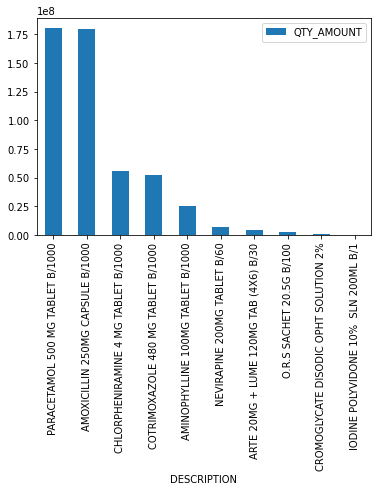

In [ ]:
table.plot(kind='bar');

Drug by quantity of amount consumed, the wo first drugs most consumed by quantinty of amount are PARACETAMOL 500 MG TABLET B/1000 in amount equal to 179,795,584, followed by
AMOXICILLIN 250MG CAPSULE B/1000 in amount equal to	179072549.

In [ ]:
table2 = pd.pivot_table(data_coded,index=['S_LEVEL3_NAME'],aggfunc={'QTY_AMOUNT':np.sum}).sort_values('QTY_AMOUNT', ascending = False)
table2

,QTY_AMOUNT
S_LEVEL3_NAME,
RW37,43640353
RW53,26470335
RW57,24511748
Rw52,24469164
RW54,23525113
RW31,23507961
RW55,20527361
RW26,20485268
RW51,19953250


District by quantity of amount consumed, the district consumed much quantinty of drug is RW37 in amount equal to 41,724,719.

to display quantity by district on map

In [ ]:
data_coded['Month'] = pd.DatetimeIndex(data_coded['YEAR_MONTH']).month

In [ ]:
data_coded.head()

,QTY_AMOUNT,DESCRIPTION,S_LEVEL3_NAME,SITE_NAME,YEAR_MONTH
10,50,CROMOGLYCATE DISODIC OPHT SOLUTION 2%,RW42,Gakenke,2015-01-01
12,6700,AMOXICILLIN 250MG CAPSULE B/1000,RW42,Gakenke,2015-01-01
16,17609,PARACETAMOL 500 MG TABLET B/1000,RW24,Huye,2015-01-01
23,3083,PARACETAMOL 500 MG TABLET B/1000,RW53,Gatsibo,2015-01-01
30,117,NEVIRAPINE 200MG TABLET B/60,RW22,Gisagara,2015-01-01


In [ ]:
table4 = pd.pivot_table(data_coded,index=['Month'],aggfunc={'QTY_AMOUNT':np.mean}).sort_values('QTY_AMOUNT', ascending = False)
table4
#Number of inflation crisis by Country
# data_coded.groupby('Month').agg({'QTY_AMOUNT':'sum'}).sort_values('QTY_AMOUNT', ascending = False)

,QTY_AMOUNT
Month,
8,2732.814026
3,2671.917883
5,2659.023657
4,2620.310207
6,2529.109720
1,2438.208599
2,2345.457694
7,2172.094570
10,2106.681079


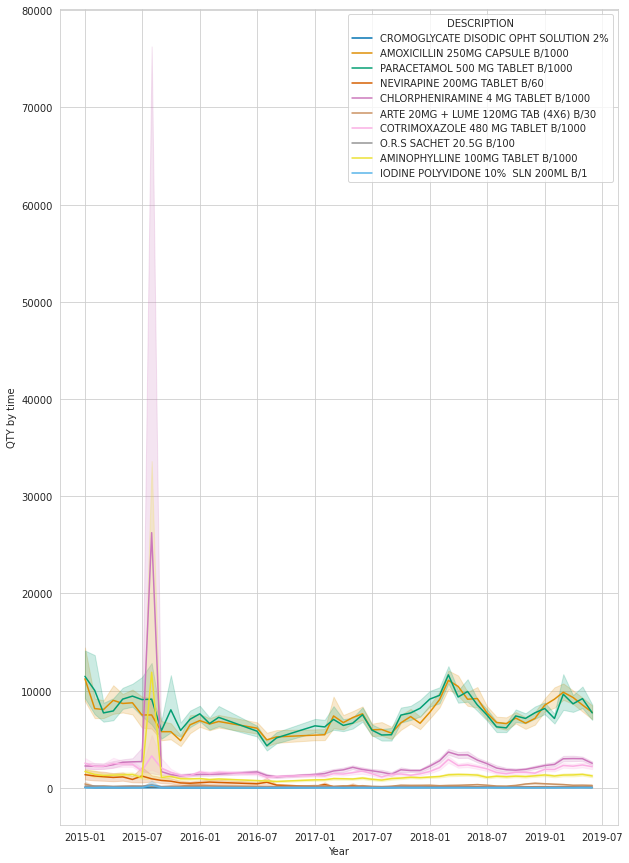

In [ ]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (10,15))
sns.lineplot(x = 'YEAR_MONTH', y = 'QTY_AMOUNT',hue='DESCRIPTION', data = data_coded, palette = 'colorblind')
plt.xlabel('Year')
plt.ylabel('QTY by time')
display()

the figure above shows the yearly pattern by amount of drugs consumed. PARACETAMOL 500 MG TABLET B/1000 and AMOXICILLIN 250MG CAPSULE B/1000 are highly consumed than others, And in August 2015 there is high pink of consumption in all drugs.

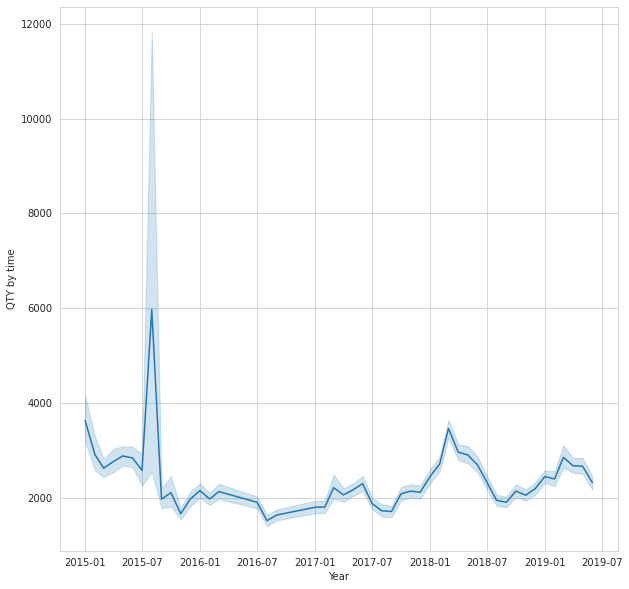

In [ ]:
#Let's have a look at amount by description
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (10,10))
sns.lineplot(x = 'YEAR_MONTH', y = 'QTY_AMOUNT', data = data_coded, palette = 'colorblind')
plt.xlabel('Year')
plt.ylabel('QTY by time')
display()

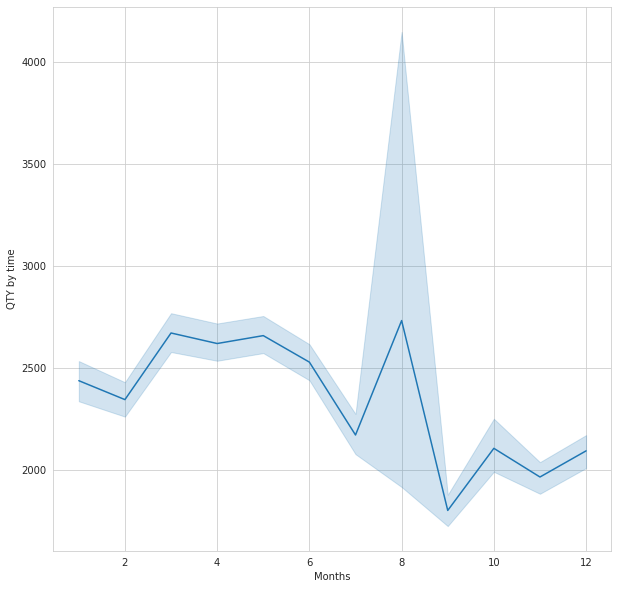

In [ ]:
#Let's have a look at amount by description
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (10,10))
sns.lineplot(x = 'Month', y = 'QTY_AMOUNT', data = data_coded, palette = 'colorblind')
plt.xlabel('Months')
plt.ylabel('QTY by time')
display()

# cleaning for modeling

In [ ]:
# renaming column
data = data_coded[['QTY_AMOUNT','DESCRIPTION','S_LEVEL3_NAME','YEAR_MONTH']]
data = data.rename(columns = {'QTY_AMOUNT': 'amount', 'DESCRIPTION': 'drugs','S_LEVEL3_NAME':'distr','YEAR_MONTH':'time'}, inplace = False)

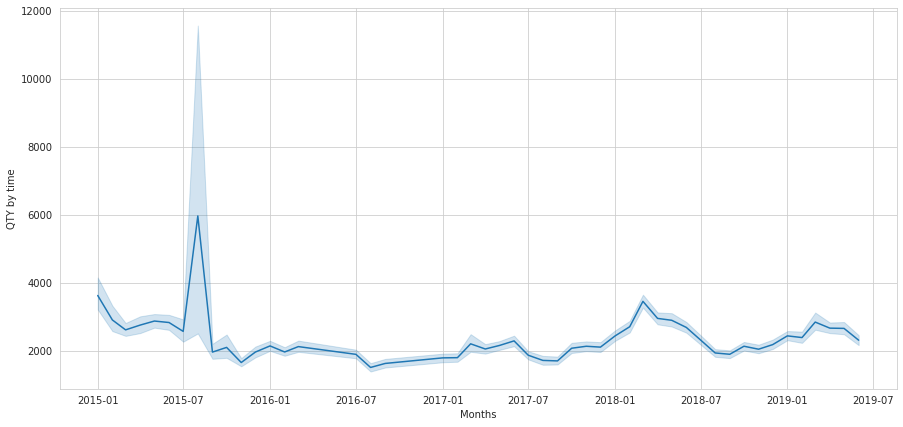

In [ ]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
sns.lineplot(x = 'time', y = 'amount', data = data, palette = 'colorblind')
plt.xlabel('Months')
plt.ylabel('QTY by time')
display()

In [ ]:
# How many distrtict and drugss are there?
data.drugs.nunique(), data.distr.nunique()

(10, 30)

In [ ]:
# Time Range 
data["time"].min(), data["time"].max(), data["amount"].min(), data["amount"].max()

(Timestamp('2015-01-01 00:00:00'),
 Timestamp('2019-06-01 00:00:00'),
 0,
 9310000)

In [ ]:
data.drop(data.loc[data['amount']==0].index, inplace=True)

In [ ]:
data["time"].min(), data["time"].max(), data["amount"].min(), data["amount"].max()

(Timestamp('2015-01-01 00:00:00'),
 Timestamp('2019-06-01 00:00:00'),
 1,
 9310000)

In [ ]:
data.describe()

,amount
count,2.112520e+05
mean,2.394576e+03
std,2.320264e+04
min,1.000000e+00
25%,3.800000e+01
50%,3.000000e+02
75%,2.000000e+03
max,9.310000e+06


In [ ]:
# How many items are in the in the district?
data.groupby(["S_LEVEL3_NAME"])["DESCRIPTION"].nunique()

S_LEVEL3_NAME
RW11    10
RW12    10
RW13    10
RW21    10
RW22    10
RW23    10
RW24    10
RW26    10
RW27    10
RW28    10
RW31    10
RW32    10
RW33    10
RW34    10
RW35    10
RW36    10
RW37    10
RW41    10
RW42    10
RW43    10
RW44    10
RW45    10
RW51    10
RW53    10
RW54    10
RW55    10
RW56    10
RW57    10
Rw25    10
Rw52    10
Name: DESCRIPTION, dtype: int64

In [ ]:
data.head()

,amount,drugs,distr,time
10,50,CROMOGLYCATE DISODIC OPHT SOLUTION 2%,RW42,2015-01-01
12,6700,AMOXICILLIN 250MG CAPSULE B/1000,RW42,2015-01-01
16,17609,PARACETAMOL 500 MG TABLET B/1000,RW24,2015-01-01
23,3083,PARACETAMOL 500 MG TABLET B/1000,RW53,2015-01-01
30,117,NEVIRAPINE 200MG TABLET B/60,RW22,2015-01-01


In [ ]:
#dealing with outlier in training dataset
#dealing with outlier
low = .15
high = .85

# Step 1: compute 5% percentile and the 95% percentile of each column in the dataset
quantile_df = data.quantile([low, high])
quantile_df

print('Number of rows before outlier removal: {}'.format(data.shape))
#print("Dataset after removing outlier: ",x_df_advert.head())
#since outlier has been done on water, it does not be back in the list of columns and categorical data as well.
list_col = ['amount']

for column in list_col:

   data = data[(data[column] > quantile_df.loc[0.15, column]) & (data[column] < quantile_df.loc[0.85, column])]

print("Shape of the dataset without outlier: ",data.shape)

Number of rows before outlier removal: (215029, 4)
Shape of the dataset without outlier:  (149740, 4)


In [ ]:
data.describe()

,amount
count,146584.000000
mean,854.102944
std,1090.490681
min,16.000000
25%,70.000000
50%,300.000000
75%,1200.000000
max,4411.000000


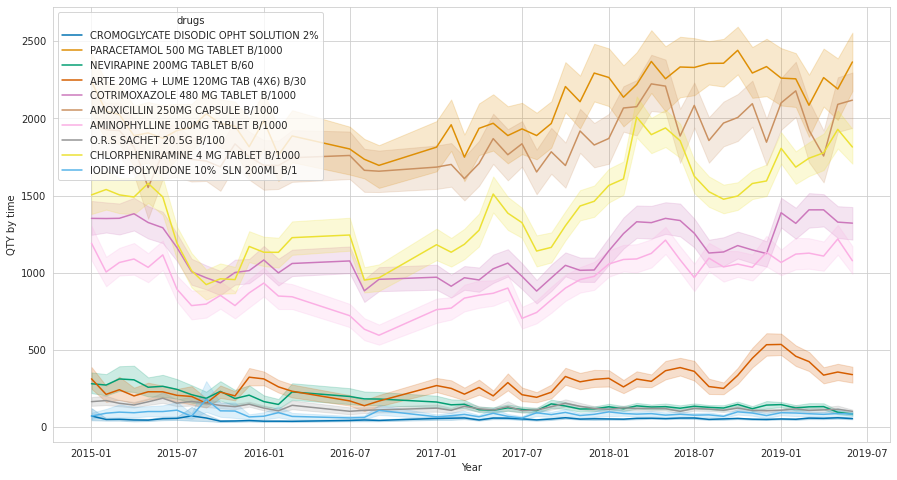

In [ ]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (15,8))
sns.lineplot(x = 'time', y = 'amount',hue='drugs', data = data, palette = 'colorblind')
plt.xlabel('Year')
plt.ylabel('QTY by time')
display()

In [ ]:
data.head()

,amount,drugs,distr,time
10,50,CROMOGLYCATE DISODIC OPHT SOLUTION 2%,RW42,2015-01-01
23,3083,PARACETAMOL 500 MG TABLET B/1000,RW53,2015-01-01
30,117,NEVIRAPINE 200MG TABLET B/60,RW22,2015-01-01
60,100,ARTE 20MG + LUME 120MG TAB (4X6) B/30,Rw25,2015-01-01
69,1000,COTRIMOXAZOLE 480 MG TABLET B/1000,RW32,2015-01-01


In [ ]:
# Dataframe must be sorted by date because of Time Series Split 
df = data.sort_values("time")

# to split test and train 
train = df.loc[(df["time"] < "2019-01-01"), :]
test = df.loc[(df["time"] > "2018-06-01"), :]
train.shape, test.shape

((130418, 4), (39966, 4))

# Train

In [ ]:
# adding year, month, and week column in a train dataframe
train['Month']=train.time.dt.month
train['year']=train.time.dt.year
train['week']=train.time.dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the

In [ ]:
# data summary of continuous variable
train.describe()

,amount,Month,year,week
count,130418.000000,130418.000000,130418.000000,130418.000000
mean,826.882578,6.423492,2016.657509,26.478224
std,1067.653937,3.457569,1.165947,15.200485
min,14.000000,1.000000,2015.000000,1.000000
25%,65.000000,3.000000,2015.000000,13.000000
50%,296.000000,7.000000,2017.000000,26.000000
75%,1142.000000,9.000000,2018.000000,39.000000
max,4335.000000,12.000000,2018.000000,53.000000


In [ ]:
test.describe()

,amount
count,39966.000000
mean,868.950858
std,1110.267027
min,14.000000
25%,60.000000
50%,281.000000
75%,1270.000000
max,4335.000000


In [ ]:
# first 5 observations of train set
train.head()

,amount,drugs,distr,time,Month,year,week
10,50,CROMOGLYCATE DISODIC OPHT SOLUTION 2%,RW42,2015-01-01,1,2015,1
65559,16,IODINE POLYVIDONE 10% SLN 200ML B/1,RW11,2015-01-01,1,2015,1
65630,108,O.R.S SACHET 20.5G B/100,RW27,2015-01-01,1,2015,1
65688,114,CROMOGLYCATE DISODIC OPHT SOLUTION 2%,RW36,2015-01-01,1,2015,1
65761,2000,CHLORPHENIRAMINE 4 MG TABLET B/1000,RW31,2015-01-01,1,2015,1


# grouping data by specific variable

In [ ]:
# grouping total_amount by year, month, week, drugs, and districts
time_series_dd= train.groupby(['year','Month','drugs','distr']).agg(date=('time','first'),
                                                              total_amount=('amount',np.sum)
                                                              ).reset_index().sort_values('date')

In [ ]:
# first 5 observations of train set grouped with drugs and districts added.
time_series_dd.head()

,year,Month,drugs,distr,date,total_amount
0,2015,1,AMINOPHYLLINE 100MG TABLET B/1000,RW11,2015-01-01,1330
180,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW28,2015-01-01,188
181,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW31,2015-01-01,69
182,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW32,2015-01-01,16
183,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW34,2015-01-01,89


In [ ]:
time_series_dd.describe()

,year,Month,total_amount
count,12120.000000,12120.000000,12120.000000
mean,2016.578053,6.291584,8882.253383
std,1.178309,3.443790,9522.359857
min,2015.000000,1.000000,16.000000
25%,2015.000000,3.000000,813.750000
50%,2017.000000,7.000000,4987.000000
75%,2018.000000,9.000000,15263.250000
max,2018.000000,12.000000,57513.000000


[]

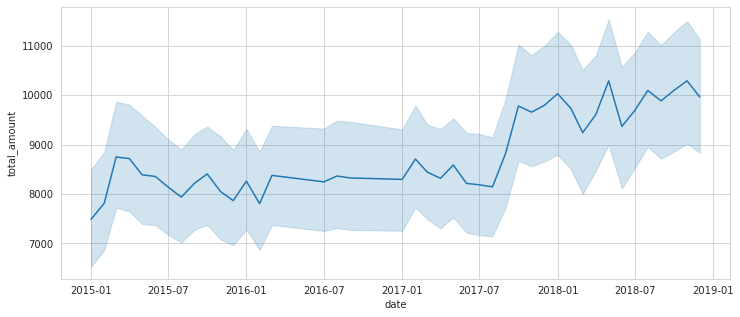

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
sns.lineplot(x='date',y='total_amount',data=time_series_dd)
plt.plot()

In [ ]:
# # saving to csv file
# time_series_dd.to_csv('Time_series_d.csv')
# files.download('Time_series_d.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# test set

In [ ]:
test['Month']=test.time.dt.month
test['year']=test.time.dt.year
test['week']=test.time.dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we 

In [ ]:
test.describe()

,amount,Month,year,week
count,39966.000000,39966.000000,39966.000000,39966.000000
mean,868.950858,6.596707,2018.483461,24.836911
std,1110.267027,3.448050,0.499733,14.869292
min,14.000000,1.000000,2018.000000,1.000000
25%,60.000000,4.000000,2018.000000,14.000000
50%,281.000000,7.000000,2018.000000,26.000000
75%,1270.000000,10.000000,2019.000000,40.000000
max,4335.000000,12.000000,2019.000000,48.000000


# grouping data by specific variable

In [ ]:
time_series_test= test.groupby(['year','Month','drugs','distr']).agg(date=('time','first'),
                                                              total_amount=('amount',np.sum)
                                                              ).reset_index().sort_values('date')

In [ ]:
# time_series_test['total_amount'] = time_series_test['total_amount'].astype(int)
# time_series_test['total_amount'] = time_series_test['total_amount']//100
# # data_coded['QTY_AMOUNT'] = data_coded['QTY_AMOUNT'].abs()

In [ ]:
time_series_test.head()

,year,Month,drugs,distr,date,total_amount
0,2018,7,AMINOPHYLLINE 100MG TABLET B/1000,RW11,2018-07-01,1338
199,2018,7,IODINE POLYVIDONE 10% SLN 200ML B/1,RW55,2018-07-01,160
198,2018,7,IODINE POLYVIDONE 10% SLN 200ML B/1,RW54,2018-07-01,324
197,2018,7,IODINE POLYVIDONE 10% SLN 200ML B/1,RW53,2018-07-01,244
196,2018,7,IODINE POLYVIDONE 10% SLN 200ML B/1,RW45,2018-07-01,328


In [ ]:
time_series_test.describe()

,year,Month,total_amount
count,3502.000000,3502.000000,3502.000000
mean,2018.499429,6.497430,9841.053113
std,0.500071,3.446804,10307.604406
min,2018.000000,1.000000,14.000000
25%,2018.000000,4.000000,927.000000
50%,2018.000000,7.000000,5564.000000
75%,2019.000000,9.000000,17392.000000
max,2019.000000,12.000000,53952.000000


[]

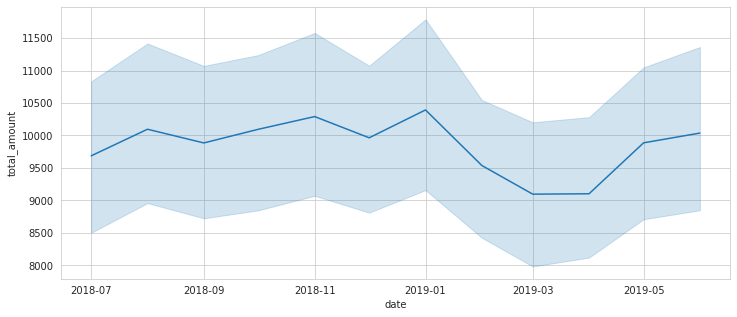

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x='date',y='total_amount',data=time_series_test)
plt.plot()

In [ ]:
# # saving to csv file
# time_series_test.to_csv('Time_series_test.csv')
# files.download('Time_series_test.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# *Loading grouped data*

In [ ]:
time_series_dd=pd.read_csv("/content/gdrive/MyDrive/Drug_prediction/Time_series_d.csv")
time_series_test=pd.read_csv("/content/gdrive/MyDrive/Drug_prediction/Time_series_test.csv")
time_series_dd=time_series_dd[['year','Month','drugs','distr','date','total_amount']]
time_series_test=time_series_test[['year','Month','drugs','distr','date','total_amount']]
time_series_test.head()

,year,Month,drugs,distr,date,total_amount
0,2018,7,AMINOPHYLLINE 100MG TABLET B/1000,RW11,2018-07-01,1338
1,2018,7,IODINE POLYVIDONE 10% SLN 200ML B/1,RW55,2018-07-01,160
2,2018,7,IODINE POLYVIDONE 10% SLN 200ML B/1,RW54,2018-07-01,324
3,2018,7,IODINE POLYVIDONE 10% SLN 200ML B/1,RW53,2018-07-01,244
4,2018,7,IODINE POLYVIDONE 10% SLN 200ML B/1,RW45,2018-07-01,328


# Model Building

Train

In [ ]:
#Add a trend component to our timeseres with drugs added
time_series_dd['trend']= range(time_series_dd.shape[0])
# change month column to category for onehot encoding process
time_series_dd['Month']=time_series_dd['Month'].astype('category')
time_series_dd['drugs']=time_series_dd['drugs'].astype('category')
time_series_dd['distr']=time_series_dd['distr'].astype('category')
# time_series_dd['time']=time_series_dd['time'].astype('datetime64[ns]')
# dropping columns not required in model
X= time_series_dd.drop(['year','date','total_amount'],axis=1)
# dummies and their columns names
names= pd.get_dummies(X).columns
X=pd.get_dummies(X).values
# dependent variable
y= time_series_dd.total_amount.values
# sc = StandardScaler()
# y=np.log(y)
# y=y.reshape(-1,1)
# # y=sc.fit_transform(y)
# # sklearn.preprocessing.MinMaxScaler
# scaler = MinMaxScaler()
# y=scaler.fit_transform(y)

Test

In [ ]:
#Add a trend component to our timeseres test
time_series_test['trend']= range(time_series_test.shape[0])
# change month column to category for onehot encoding process
time_series_test['Month']=time_series_test['Month'].astype('category')
time_series_test['drugs']=time_series_test['drugs'].astype('category')
time_series_test['distr']=time_series_test['distr'].astype('category')
# dropping columns not required in model
X_test= time_series_test.drop(['year','date','total_amount'],axis=1)
# dummies and their columns names
names_test= pd.get_dummies(X_test).columns
X_test=pd.get_dummies(X_test).values
# dependent variable
y_test= time_series_test.total_amount.values
# y_test=np.log(y_test)
# y_test=y_test.reshape(-1,1)
# # y_test=sc.fit_transform(y_test)
# y_test=scaler.fit_transform(y_test)


Linear Ligression

In [ ]:
model = LinearRegression()
model.fit(X,y)
model.get_params()
model.coef_
# Prediction by model  train
prediction= model.predict(X)

from sklearn.metrics import mean_squared_error
mse_train_d=np.sqrt(mean_squared_error(y,prediction))
print('Mean square error train: ',mse_train_d)

# test Prediction by model
pred_test= model.predict(X_test)
mse_test=np.sqrt(mean_squared_error(y_test,pred_test))
print('Mean square error test: ', mse_test)
diff=mse_train_d-mse_test
print('Mean square error difference between train and test: ', diff)
# if diff>0:
#   print('model underfit')

Mean square error train:  0.8245639173330952
Mean square error test:  0.8856149466186487
Mean square error difference between train and test:  -0.061051029285553504


In [ ]:
import numpy as np
print("train:",np.exp(0.8245639173330952))
print("test:",np.exp(0.8856149466186487))

train: 2.2808858936185206
test: 2.4244748557751508


In [ ]:
model.coef_

array([ 3.61856158e-05,  3.43944340e-02, -2.08661357e-02,  1.26804200e-02,
        1.59082067e-02,  2.30376548e-02,  1.08058136e-02, -4.79606471e-02,
       -8.98179194e-02, -4.72452715e-02,  8.95493128e-02,  5.55355503e-03,
        1.39605769e-02,  1.23606956e+00,  1.46199367e+00, -9.05555715e-01,
        1.69337070e+00,  1.83537719e+00, -2.15295559e+00, -2.98849079e+00,
       -7.15629289e-01, -8.55403519e-01,  1.39122378e+00, -3.52521522e-01,
        4.23282202e-01, -3.58022473e-01,  1.33990926e-02,  2.11964415e-02,
       -5.23258350e-01,  1.60153580e-01, -6.43101360e-02, -3.91279303e-01,
       -1.95174356e-01,  5.15086053e-01, -2.26373415e-01, -8.30532406e-02,
       -1.49394463e-01, -2.76202346e-01,  2.92559189e-01,  9.20817316e-02,
        3.20983656e-02,  2.12353606e-01, -1.19534910e-01, -1.20569770e-01,
       -1.24883840e-02, -2.70656252e-02,  3.06822095e-01,  2.23720777e-01,
        1.35612044e-01,  8.14907020e-03,  2.17715118e-01, -1.39012074e-01,
        3.84031003e-01])

Test

In [ ]:
r_score_train=r2_score(y,prediction)
r_score_test=r2_score(y_test,pred_test)
print('r score of train {}'.format(r_score_train))
print('r score of test{}'.format(r_score_test))

r score of train 0.7971378128615786
r score of test0.7383021728529378


Figure

In [ ]:
# Add predictions to our timesries data
# np.exp(df['yhat'])

time_series_dd['prediction']=prediction
time_series_dd['y_actual']=y
time_series_dd['pred_exp']=np.exp(time_series_dd['prediction'])

In [ ]:
time_series_dd.head()

,year,Month,drugs,distr,date,total_amount,trend,prediction,y_actual,pred_exp
0,2015,1,AMINOPHYLLINE 100MG TABLET B/1000,RW11,2015-01-01,1330,0,8.661668,7.192934,5777.163230
1,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW28,2015-01-01,188,1,4.594491,5.236442,98.937769
2,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW31,2015-01-01,69,2,5.304788,4.234107,201.298252
3,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW32,2015-01-01,16,3,4.563364,2.772589,95.905599
4,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW34,2015-01-01,89,4,4.640380,4.488636,103.583650


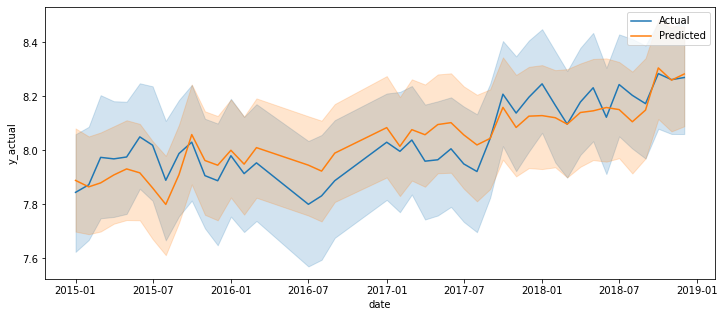

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x='date',y='y_actual',data=time_series_dd, label='Actual')
sns.lineplot(x='date',y='prediction',data=time_series_dd, label='Predicted')
plt.show()

In [ ]:
# Add predictions to our timesries data
# time_series_test['prediction']=pred_test
time_series_test['y_actual']=y_test
time_series_test.head()

,year,Month,drugs,distr,date,total_amount,trend,y_actual
0,2018,7,AMINOPHYLLINE 100MG TABLET B/1000,RW11,2018-07-01,1338,0,7.198931
1,2018,7,IODINE POLYVIDONE 10% SLN 200ML B/1,RW55,2018-07-01,160,1,5.075174
2,2018,7,IODINE POLYVIDONE 10% SLN 200ML B/1,RW54,2018-07-01,324,2,5.780744
3,2018,7,IODINE POLYVIDONE 10% SLN 200ML B/1,RW53,2018-07-01,244,3,5.497168
4,2018,7,IODINE POLYVIDONE 10% SLN 200ML B/1,RW45,2018-07-01,328,4,5.793014


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(12,5))
# sns.lineplot(x='date',y='y_test_actual',data=time_series_test, label='Actual')
# sns.lineplot(x='date',y='prediction',data=time_series_test, label='Predicted')
# plt.show()

# *Future prediction*

In [ ]:
data_pred=pd.read_excel("/content/gdrive/MyDrive/Drug_prediction/data_topredict.xlsx")
data_pred.head()

,year,Month,drugs,district,date
0,2019,7,IODINE POLYVIDONE 10% SLN 200ML B/1,Rubavu,2019-07-01
1,2019,7,IODINE POLYVIDONE 10% SLN 200ML B/1,Nyaruguru,2019-07-01
2,2019,7,IODINE POLYVIDONE 10% SLN 200ML B/1,Nyarugenge,2019-07-01
3,2019,7,IODINE POLYVIDONE 10% SLN 200ML B/1,Nyanza,2019-07-01
4,2019,7,IODINE POLYVIDONE 10% SLN 200ML B/1,Nyamasheke,2019-07-01


In [ ]:
data_pred=data_pred.replace(to_replace={'district': {"Gakenke":"RW42","Karongi":"RW31","Gicumbi":"RW45","Nyagatare":"Rw52",
                                                          "Gatsibo":"RW53","Rulindo":"RW41","Kayonza":"RW54","Rusizi":"RW36",
                                                          "Gasabo":"RW12","Bugesera":"RW57","Nyamagabe":"Rw25","Nyabihu":"RW34","Burera":"RW44",
                                                          "Huye":"RW24","Nyamasheke":"RW37","Kirehe":"RW55","Musanze":"RW43","Ruhango":"RW26",
                                                          "Nyanza":"RW21","Gisagara":"RW22","Rwamagana":"RW51","Ngoma":"RW56","Muhanga":"RW27",
                                                          "Rutsiro":"RW32","Rubavu":"RW33","Nyaruguru":"RW23","Kamonyi":"RW28","Ngororero":"RW35",
                                                          "Nyarugenge":"RW11","Kicukiro":"RW13"}}, value=None)
data_pred= data_pred.rename(columns = {'district':'distr'}, inplace = False)
data_pred.head()

,year,Month,drugs,distr,date
0,2019,7,IODINE POLYVIDONE 10% SLN 200ML B/1,RW33,2019-07-01
1,2019,7,IODINE POLYVIDONE 10% SLN 200ML B/1,RW23,2019-07-01
2,2019,7,IODINE POLYVIDONE 10% SLN 200ML B/1,RW11,2019-07-01
3,2019,7,IODINE POLYVIDONE 10% SLN 200ML B/1,RW21,2019-07-01
4,2019,7,IODINE POLYVIDONE 10% SLN 200ML B/1,RW37,2019-07-01


In [ ]:
# to merge train, test, other data to predict
# time_series_trai=time_series_dd[['year','Month','drugs','distr','date','total_amount','y_actual']]
# time_series_ttest=time_series_test[['year','Month','drugs','distr','date','total_amount','y_actual']]
time_series_trai=time_series_dd[['year','Month','drugs','distr','date','total_amount']]
time_series_ttest=time_series_test[['year','Month','drugs','distr','date','total_amount']]

df_pred=pd.concat([time_series_trai,time_series_ttest,data_pred],axis=0)
df_pred.head()

,year,Month,drugs,distr,date,total_amount
0,2015,1,AMINOPHYLLINE 100MG TABLET B/1000,RW11,2015-01-01,1330.0
1,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW28,2015-01-01,188.0
2,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW31,2015-01-01,69.0
3,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW32,2015-01-01,16.0
4,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW34,2015-01-01,89.0


In [ ]:
# to put in the same format with train and test folder.
#Add a trend component to our timeseres with drugs added
# data_pred= df_pred.drop(['y_actual'],axis=1)
df_pred['trend']= range(df_pred.shape[0])
# change month column to category for onehot encoding process
df_pred['Month']=df_pred['Month'].astype('category')
df_pred['drugs']=df_pred['drugs'].astype('category')
df_pred['distr']=df_pred['distr'].astype('category')
# time_series_dd['time']=time_series_dd['time'].astype('datetime64[ns]')
# dropping columns not required in model
X_p= df_pred.drop(['year','date','total_amount'],axis=1)
# dummies and their columns names
names= pd.get_dummies(X_p).columns
X_p=pd.get_dummies(X_p).values
# dependent variable
y_p= time_series_dd.total_amount.values
# y_p=np.log(y_p)


In [ ]:
# predict from past to future
X_pred=model.predict(X_p)
X_pred

array([ 8.66166805,  4.59449105,  5.30478765, ..., 10.45140585,
       10.35697355,  9.81544358])

In [ ]:
# Add predictions to our timesries data
df_pred['prediction']=X_pred
df_pred['pred_exp']=np.exp(df_pred['prediction'])
df_pred.head()

,year,Month,drugs,distr,date,total_amount,y_actual,prediction,pred_exp
0,2015,1,AMINOPHYLLINE 100MG TABLET B/1000,RW11,2015-01-01,1330.0,7.192934,8.661668,5777.163230
1,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW28,2015-01-01,188.0,5.236442,4.594491,98.937769
2,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW31,2015-01-01,69.0,4.234107,5.304788,201.298252
3,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW32,2015-01-01,16.0,2.772589,4.563364,95.905599
4,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW34,2015-01-01,89.0,4.488636,4.640380,103.583650


In [ ]:
df_pred["date"]= pd.to_datetime(df_pred["date"])
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19256 entries, 0 to 3587
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          19256 non-null  int64         
 1   Month         19256 non-null  int64         
 2   drugs         19256 non-null  object        
 3   distr         19256 non-null  object        
 4   date          19256 non-null  datetime64[ns]
 5   total_amount  15668 non-null  float64       
 6   y_actual      15668 non-null  float64       
 7   prediction    19256 non-null  float64       
 8   pred_exp      19256 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 1.5+ MB


Plotting

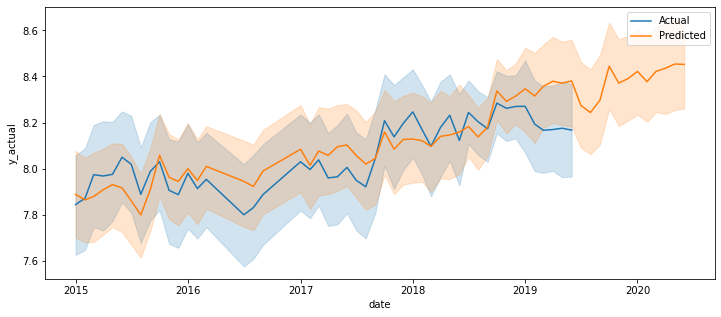

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x='date',y='y_actual',data=df_pred, label='Actual')
sns.lineplot(x='date',y='prediction',data=df_pred, label='Predicted')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(n_estimators=18000,max_depth=15, max_features=15, min_samples_leaf=5,random_state=0)
regr.fit(X, y)
y_pred1 = regr.predict(X)
y_pred2 = regr.predict(X_test)

MSE_train= np.sqrt(mean_squared_error(y,y_pred1))
MSE_test= np.sqrt(mean_squared_error(y_test,y_pred2))
print('mean square error of train {}'.format(MSE_train))
print('mean square error of test {}'.format(MSE_test))
r_score_train=r2_score(y,y_pred1)
r_score_test=r2_score(y_test,y_pred2)
print('r score of train {}'.format(r_score_train))
print('r score of test{}'.format(r_score_test))

mean square error of train 0.6434611613914816
mean square error of test 0.8441103599323876
r score of train 0.8764629780212296
r score of test0.7622564723057487


mean square error of train 8704937005.86893 <br>
mean square error of test 1714103173.7615318 <br>
r score of train 0.2783950355566909 <br>
r score of test0.5555227533679252

In [ ]:
# prediction from past to future
X_pred_r=regr.predict(X_p)
X_pred_r

array([ 8.17173771,  4.62893676,  5.36166095, ..., 10.00673245,
       10.02935674,  9.35044981])

In [ ]:
# add prediction and its exponential to return to normal values
df_pred['pred_rand']=X_pred_r
df_pred['pred_rand_exp']=np.exp(df_pred['pred_rand'])
df_pred.head()

,year,Month,drugs,distr,date,total_amount,y_actual,prediction,pred_exp,pred_rand,pred_rand_exp
0,2015,1,AMINOPHYLLINE 100MG TABLET B/1000,RW11,2015-01-01,1330.0,7.192934,8.661668,5777.163230,8.171738,3539.489225
1,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW28,2015-01-01,188.0,5.236442,4.594491,98.937769,4.628937,102.405125
2,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW31,2015-01-01,69.0,4.234107,5.304788,201.298252,5.361661,213.078564
3,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW32,2015-01-01,16.0,2.772589,4.563364,95.905599,4.124141,61.814663
4,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW34,2015-01-01,89.0,4.488636,4.640380,103.583650,4.646138,104.181853


Plot with future prediction

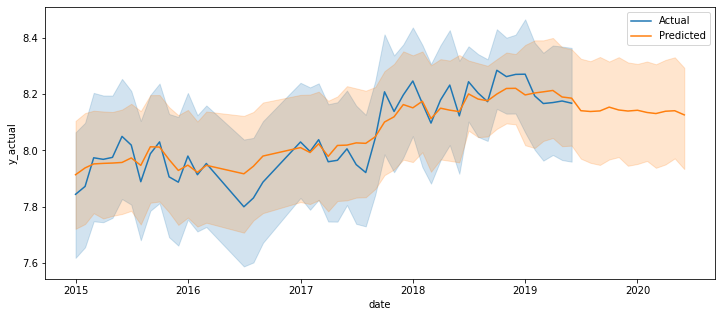

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x='date',y='y_actual',data=df_pred, label='Actual')
sns.lineplot(x='date',y='pred_rand',data=df_pred, label='Predicted')
plt.show()

In [ ]:
# # saving to csv file
# df_pred.to_csv('df_prediction.csv')
# files.download('df_prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# after removing outlier with 10,000 n_estimators, 40 max depth, 10 max features, and 6 min samples leaf

mean square error of train 34825531.86416882 <br>
mean square error of test 80634343.4187691 <br>
r score of train 0.8447035939401972 <br>
r score of test0.6944713765392949

In [ ]:
time_series_dd['pred']=y_pred1
# time_series_dd['pred_exp_r']=np.exp(time_series_dd['pred'])

In [ ]:
time_series_dd.head()

,year,Month,drugs,distr,date,total_amount,trend,prediction,y_actual,pred_exp,pred
0,2015,1,AMINOPHYLLINE 100MG TABLET B/1000,RW11,2015-01-01,1330,0,8.661668,7.192934,5777.163230,8.171738
180,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW28,2015-01-01,188,1,4.594491,5.236442,98.937769,4.628937
181,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW31,2015-01-01,69,2,5.304788,4.234107,201.298252,5.361661
182,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW32,2015-01-01,16,3,4.563364,2.772589,95.905599,4.124141
183,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW34,2015-01-01,89,4,4.640380,4.488636,103.583650,4.646138


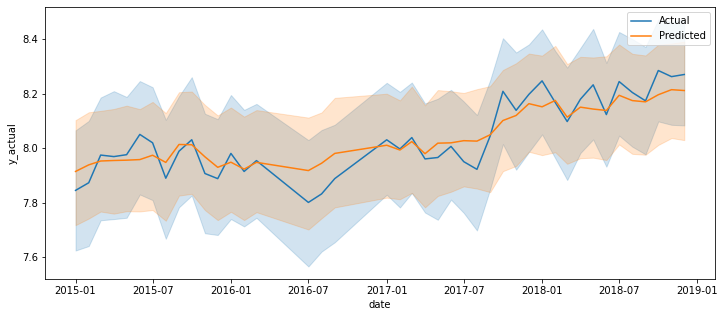

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x='date',y='y_actual',data=time_series_dd, label='Actual')
sns.lineplot(x='date',y='pred',data=time_series_dd, label='Predicted')
plt.show()

# Neural Network



In [ ]:

reg = l2(0.8)

from keras import Sequential 
from keras.layers import Dense
def build_regressor():    
  regressor = Sequential()    
  regressor.add(Dense(units=1000, input_dim=53, kernel_regularizer=reg))  
  regressor.add(Dense(units=1000, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=500, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=500, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=250, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=250, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=125, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=125, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=75, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=75, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=1))  
  # regressor.add(Dense(y_train, activation='linear', kernel_regularizer=reg))
  regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])    
  return regressor

from keras.wrappers.scikit_learn import KerasRegressor 
regressor = KerasRegressor(build_fn=build_regressor, batch_size=64,epochs=200)

regressor.fit(X,y)

y_pred= regressor.predict(X_test)
y_pred_tr=regressor.predict(X)

MSE_train= np.sqrt(mean_squared_error(y,y_pred_tr))
MSE_test= np.sqrt(mean_squared_error(y_test,y_pred))
print('mean square error of train {}'.format(MSE_train))
print('mean square error of test {}'.format(MSE_test))
r_score_train=r2_score(y,y_pred_tr)
r_score_test=r2_score(y_test,y_pred)
print('r score of train {}'.format(r_score_train))
print('r score of test{}'.format(r_score_test))


Epoch 1/200
191/191 [==============================] - 9s 39ms/step - loss: 108506848.0000 - mae: 8018.0620 - accuracy: 0.0000e+00
Epoch 2/200
191/191 [==============================] - 7s 39ms/step - loss: 104764480.0000 - mae: 7973.6294 - accuracy: 0.0000e+00
Epoch 3/200
191/191 [==============================] - 7s 38ms/step - loss: 104549600.0000 - mae: 7965.3804 - accuracy: 0.0000e+00
Epoch 4/200
191/191 [==============================] - 7s 38ms/step - loss: 103867776.0000 - mae: 7954.0161 - accuracy: 0.0000e+00
Epoch 5/200
191/191 [==============================] - 7s 38ms/step - loss: 103950256.0000 - mae: 7947.0820 - accuracy: 0.0000e+00
Epoch 6/200
191/191 [==============================] - 7s 38ms/step - loss: 103212512.0000 - mae: 7890.7993 - accuracy: 0.0000e+00
Epoch 7/200
191/191 [==============================] - 7s 38ms/step - loss: 97847216.0000 - mae: 7547.5918 - accuracy: 0.0000e+00
Epoch 8/200
191/191 [==============================] - 7s 38ms/step - loss: 10502959

In [ ]:
print('RMSE_train:',np.sqrt(4936.762585429949))
print('RMSE_test:',np.sqrt(6398.159196386866))

RMSE_train: 70.26209921024243
RMSE_test: 79.98849415001426


# with cleaned data from outlier

mean square error of train 44511609.823050395 <br>
mean square error of test 99966904.19585349 <br>
r score of train 0.8015107691558893 <br>
r score of test0.6212190818995629

mean square error of train 9633484567.723328 <br>
mean square error of test 1086953942.6840506 <br>
r score of train 0.20142210285147832 <br>
r score of test0.7181463151953198 <br>

# Add predictions to our timesries data
time_series_dd['preds']=preds

In [ ]:
# prediction from past to future
X_pred_nn=regressor.predict(X_p)
X_pred_nn

array([  835.58215,   115.76795,   400.20016, ..., 24016.85   ,
       26663.379  , 13720.473  ], dtype=float32)

In [ ]:
df_pred['preds']=X_pred_nn
# time_series_dd['pred_exp_nn']=np.exp(time_series_dd['preds'])
df_pred.head()

,year,Month,drugs,distr,date,total_amount,trend,preds
0,2015,1,AMINOPHYLLINE 100MG TABLET B/1000,RW11,2015-01-01,1330.0,0,835.582153
1,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW28,2015-01-01,188.0,1,115.767952
2,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW31,2015-01-01,69.0,2,400.200165
3,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW32,2015-01-01,16.0,3,76.383865
4,2015,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW34,2015-01-01,89.0,4,161.978226


In [ ]:
df_pred["date"]= pd.to_datetime(df_pred["date"])
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19256 entries, 0 to 3587
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          19256 non-null  int64         
 1   Month         19256 non-null  category      
 2   drugs         19256 non-null  category      
 3   distr         19256 non-null  category      
 4   date          19256 non-null  datetime64[ns]
 5   total_amount  15668 non-null  float64       
 6   trend         19256 non-null  int64         
 7   preds         19256 non-null  float32       
dtypes: category(3), datetime64[ns](1), float32(1), float64(1), int64(2)
memory usage: 886.1 KB


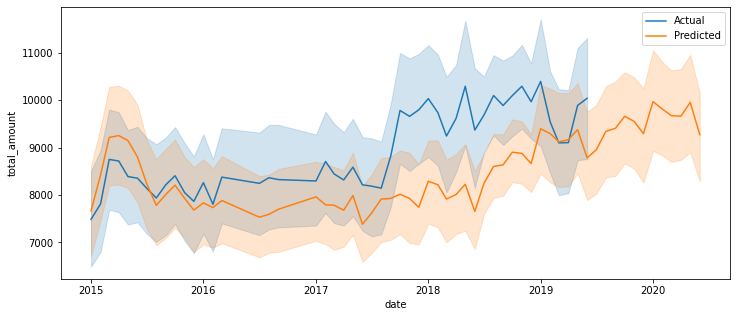

In [ ]:
# drugs and district added
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
sns.lineplot(x='date',y='total_amount',data=df_pred, label='Actual')
sns.lineplot(x='date',y='preds',data=df_pred, label='Predicted')
plt.show()

In [ ]:
# saving to csv file
df_pred.to_csv('df_pred_nn.csv')
files.download('df_pred_nn.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>